In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
from itertools import product
from datetime import datetime

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# 数据加载
df = pd.read_csv('./bitcoin_2012-01-01_to_2018-10-31.csv')

In [4]:
# 将时间作为 df 的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index  =df.Timestamp
# 数据探索
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [5]:
# 按照月、季度、年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

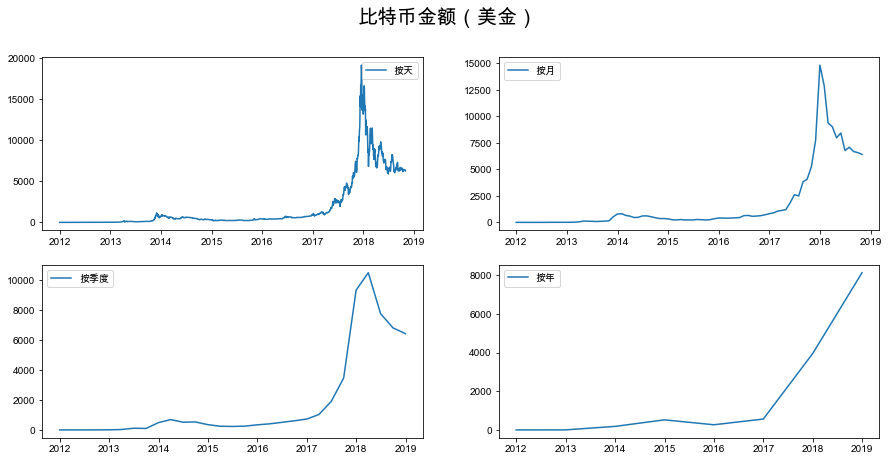

In [6]:
# 按照天、月、季度、年来显示比特币的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.suptitle('比特币金额（美金）', fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()  # 创建图例
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()

In [7]:
# 设置参数范围
ps = range(0, 3)
ds = range(0, 3)
qs = range(0, 3)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
parameters_list

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [8]:
# 寻找最优 ARIMA 模型采参数、即 best_aic 最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARIMA(df_month.Weighted_Price,order=(param[0], param[1], param[2])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
results

[[(0, 0, 0), 1574.953535769346],
 [(0, 0, 1), 1489.7109519112332],
 [(0, 0, 2), 1443.9749155174063],
 [(0, 1, 0), 1367.1393539775709],
 [(0, 1, 1), 1365.5220079782596],
 [(0, 1, 2), 1366.626285437582],
 [(0, 2, 0), 1391.7582047275291],
 [(0, 2, 1), 1356.7187014028034],
 [(0, 2, 2), 1355.0563373560608],
 [(1, 0, 0), 1388.1995198178317],
 [(1, 0, 1), 1385.5663097330398],
 [(1, 0, 2), 1387.64611100627],
 [(1, 1, 0), 1366.5215567477765],
 [(1, 1, 1), 1365.8728114038056],
 [(1, 1, 2), 1367.97716965739],
 [(1, 2, 0), 1385.6801312907285],
 [(1, 2, 1), 1356.0506081154854],
 [(1, 2, 2), 1355.4171897363765],
 [(2, 0, 0), 1386.5649665809933],
 [(2, 0, 1), 1387.4295248649983],
 [(2, 0, 2), 1389.188148510824],
 [(2, 1, 0), 1366.0795570584953],
 [(2, 1, 1), 1368.1168148104264],
 [(2, 1, 2), 1369.9021410705689],
 [(2, 2, 0), 1376.9979081438248],
 [(2, 2, 1), 1355.6849703525536],
 [(2, 2, 2), 1356.8111521451456]]

In [9]:
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型：', best_model.summary())

最优模型：                                SARIMAX Results                                
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -674.528
Date:                Sun, 28 Aug 2022   AIC                           1355.056
Time:                        21:36:58   BIC                           1362.240
Sample:                    12-31-2011   HQIC                          1357.938
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7610      0.063    -12.148      0.000      -0.884      -0.638
ma.L2         -0.2390      0.033     -7.148      0.000      -0.305      -0.173
sigma2      9.614e+05   6.18e-08   1.56e+13   

In [10]:
# 比特币预测
df_month2 = df_month[['Weighted_Price']]
date_list = [
    datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), 
    datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
date_list

[datetime.datetime(2018, 11, 30, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 1, 31, 0, 0),
 datetime.datetime(2019, 2, 28, 0, 0),
 datetime.datetime(2019, 3, 31, 0, 0),
 datetime.datetime(2019, 4, 30, 0, 0),
 datetime.datetime(2019, 5, 31, 0, 0),
 datetime.datetime(2019, 6, 30, 0, 0)]

In [11]:
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2

,Weighted_Price,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
2011-12-31,4.471603,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,6.208550,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,5.252527,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,4.962021,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,4.976547,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_month2['forecast'] = best_model.predict(start=0, end=91)

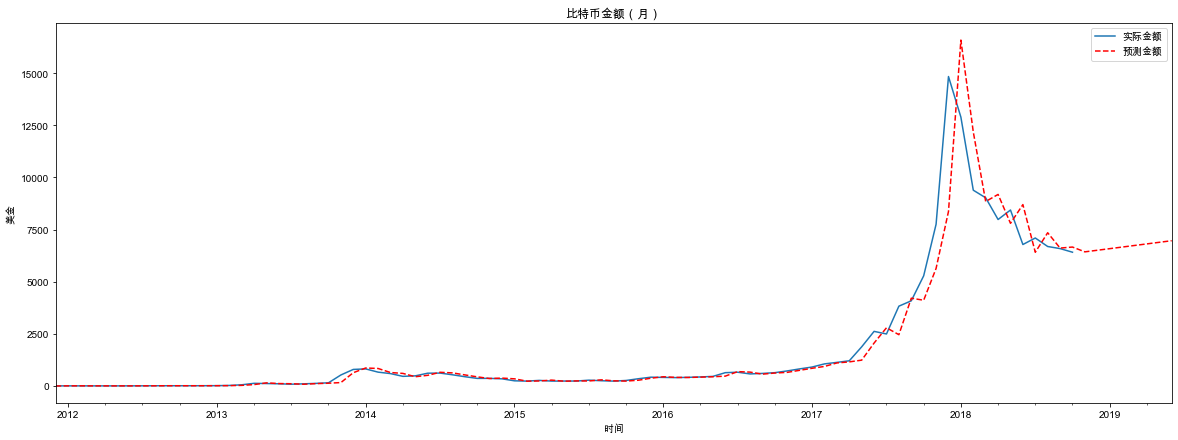

In [15]:
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()